<a href="https://colab.research.google.com/github/Gizem-kaya/Image-Processing-with-Python/blob/master/Filter_Contrast_Transformation_Morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.filters import gaussian


In [43]:
def comparison(original, filtered, new_title):
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (8,6), sharex = True, sharey = True )

  ax1.imshow(original, cmap = plt.cm.gray)
  ax1.set_title('Original')
  ax1.axis('off')

  ax2.imshow(filtered, cmap = plt.cm.gray)
  ax2.set_title(new_title)
  ax2.axis('off')

  plt.show()

# **Edge Detection**

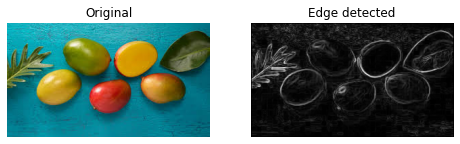

In [42]:
image = plt.imread("edge_detection.jpg")
grayscaled = rgb2gray(image)

edge_sobel = sobel(grayscaled)

comparison(image, edge_sobel, "Edge detected")
plt.show()

 # **Blurring**

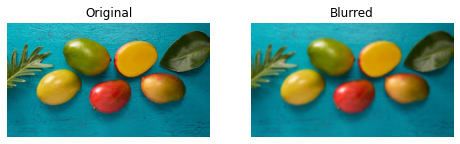

In [47]:
gaussian_im = gaussian(image, multichannel = True)  #If the image has rgb, multichannel must be True.

comparison(image, gaussian_im, "Blurred")